# 1. EDA - Exploratory Data Analysis

Dataset source: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

### Context

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

### Source

Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

### Data

In the dataframe we can find the 96 columns - 1 targe column and 95 factors and 6819 rows:

| Column | Description |
| ------ | ----------- |
| Y | Bankrupt?: Class label |
| X1 | ROA(C) before interest and depreciation before interest: Return On Total Assets(C)|
| X2 | ROA(A) before interest and % after tax: Return On Total Assets(A)
| X3 | ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
| X4 | Operating Gross Margin: Gross Profit/Net Sales
| X5 | Realized Sales Gross Margin: Realized Gross Profit/Net Sales
| X6 | Operating Profit Rate: Operating Income/Net Sales
| X7 | Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
| X8 | After-tax net Interest Rate: Net Income/Net Sales
| X9 | Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
| X10 | Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
| X11 | Operating Expense Rate: Operating Expenses/Net Sales
| X12 | Research and development expense rate: (Research and Development Expenses)/Net Sales
| X13 | Cash flow rate: Cash Flow from Operating/Current Liabilities
| X14 | Interest-bearing debt interest rate: Interest-bearing Debt/Equity
| X15 | Tax rate (A): Effective Tax Rate
| X16 | Net Value Per Share (B): Book Value Per Share(B)
| X17 | Net Value Per Share (A): Book Value Per Share(A)
| X18 | Net Value Per Share (C): Book Value Per Share(C)
| X19 | Persistent EPS in the Last Four Seasons: EPS-Net Income
| X20 | Cash Flow Per Share
| X21 | Revenue Per Share (Yuan ¥): Sales Per Share
| X22 | Operating Profit Per Share (Yuan ¥): Operating Income Per Share
| X23 | Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
| X24 | Realized Sales Gross Profit Growth Rate
| X25 | Operating Profit Growth Rate: Operating Income Growth
| X26 | After-tax Net Profit Growth Rate: Net Income Growth
| X27 | Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
| X28 | Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
| X29 | Total Asset Growth Rate: Total Asset Growth
| X30 | Net Value Growth Rate: Total Equity Growth
| X31 | Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
| X32 | Cash Reinvestment %: Cash Reinvestment Ratio
| X33 | Current Ratio
| X34 | Quick Ratio: Acid Test
| X35 | Interest Expense Ratio: Interest Expenses/Total Revenue
| X36 | Total debt/Total net worth: Total Liability/Equity Ratio
| X37 | Debt ratio %: Liability/Total Assets
| X38 | Net worth/Assets: Equity/Total Assets
| X39 | Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
| X40 | Borrowing dependency: Cost of Interest-bearing Debt
| X41 | Contingent liabilities/Net worth: Contingent Liability/Equity
| X42 | Operating profit/Paid-in capital: Operating Income/Capital
| X43 | Net profit before tax/Paid-in capital: Pretax Income/Capital
| X44 | Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
| X45 | Total Asset Turnover
| X46 | Accounts Receivable Turnover
| X47 | Average Collection Days: Days Receivable Outstanding
| X48 | Inventory Turnover Rate (times)
| X49 | Fixed Assets Turnover Frequency
| X50 | Net Worth Turnover Rate (times): Equity Turnover
| X51 | Revenue per person: Sales Per Employee
| X52 | Operating profit per person: Operation Income Per Employee
| X53 | Allocation rate per person: Fixed Assets Per Employee
| X54 | Working Capital to Total Assets
| X55 | Quick Assets/Total Assets
| X56 | Current Assets/Total Assets
| X57 | Cash/Total Assets
| X58 | Quick Assets/Current Liability
| X59 | Cash/Current Liability
| X60 | Current Liability to Assets
| X61 | Operating Funds to Liability
| X62 | Inventory/Working Capital
| X63 | Inventory/Current Liability
| X64 | Current Liabilities/Liability
| X65 | Working Capital/Equity
| X66 | Current Liabilities/Equity
| X67 | Long-term Liability to Current Assets
| X68 | Retained Earnings to Total Assets
| X69 | Total income/Total expense
| X70 | Total expense/Assets
| X71 | Current Asset Turnover Rate: Current Assets to Sales
| X72 | Quick Asset Turnover Rate: Quick Assets to Sales
| X73 | Working capitcal Turnover Rate: Working Capital to Sales
| X74 | Cash Turnover Rate: Cash to Sales
| X75 | Cash Flow to Sales
| X76 | Fixed Assets to Assets
| X77 | Current Liability to Liability
| X78 | Current Liability to Equity
| X79 | Equity to Long-term Liability
| X80 | Cash Flow to Total Assets
| X81 | Cash Flow to Liability
| X82 | CFO to Assets
| X83 | Cash Flow to Equity
| X84 | Current Liability to Current Assets
| X85 | Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
| X86 | Net Income to Total Assets
| X87 | Total assets to GNP price
| X88 | No-credit Interval
| X89 | Gross Profit to Sales
| X90 | Net Income to Stockholder's Equity
| X91 | Liability to Equity
| X92 | Degree of Financial Leverage (DFL)
| X93 | Interest Coverage Ratio (Interest expense to EBIT)
| X94 | Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
| X95 | Equity to Liability

Zaczęliśmy od analizy kolumn, ale po wstępnej analizie doszliśmy do wniosku, że wszystkie kolumny wydają się być powiązane z sukcesem rynkowym firmy. Być może wartości poszczególnych kolumn nas naprowadzą na najważniejsze czynniki.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
entire_df = pd.read_csv('data.csv')
entire_df.head() 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


As we can see the data has loaded correctly, let's split it into 3 datasets.

In [3]:
train, validation = train_test_split(entire_df, test_size=0.3, random_state=42)
train, test = train_test_split(train, test_size=30, random_state=42)

# aby numeracja wierszy była popr.
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
validation = validation.reset_index(drop=True)

From now on we'll only use the train df for our EDA

In [4]:
train.tail() 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4738,0,0.505192,0.570214,0.556025,0.604729,0.604729,0.999047,0.797472,0.809390,0.303504,...,0.817066,0.002805,0.624377,0.604729,0.841313,0.276750,0.026837,0.565368,1,0.057029
4739,0,0.491201,0.556095,0.544944,0.599728,0.599728,0.999011,0.797414,0.809335,0.303479,...,0.802420,0.003267,0.622668,0.599728,0.840690,0.282521,0.028464,0.568246,1,0.022580
4740,0,0.476820,0.540013,0.530864,0.608541,0.608541,0.999040,0.797355,0.809286,0.303316,...,0.794158,0.000678,0.622318,0.608543,0.839882,0.280812,0.021690,0.571514,1,0.026022
4741,0,0.525618,0.595781,0.576316,0.603144,0.603144,0.999046,0.797959,0.809792,0.304359,...,0.832501,0.084286,0.623449,0.603141,0.842230,0.276699,0.026807,0.565231,1,0.058207
4742,0,0.455272,0.526875,0.504791,0.601342,0.601342,0.998948,0.797374,0.809300,0.303541,...,0.792814,0.000240,0.623816,0.601341,0.839758,0.281056,0.026332,0.561292,1,0.025416


In [5]:
print("The dimensions of the df are:", train.shape) 

The dimensions of the df are: (4743, 96)


This means, that we have 4743 rows and 96 columns, let's see if there are any redundant/useless/null columns.

As we can see, all rows have non-null values in each column. Let's check for duplicates.

In [6]:
train.duplicated().sum()

0

As we can see there are no duplicate values. Let's see how many are unique for each column.

In [7]:
train.nunique().sort_values()

 Net Income Flag                       1
Bankrupt?                              2
 Liability-Assets Flag                 2
 Total Asset Turnover                361
 Net Worth Turnover Rate (times)     646
                                    ... 
 Operating Funds to Liability       4743
 Current Liability to Assets        4743
 Quick Assets/Current Liability     4743
 Cash Flow to Total Assets          4743
 Equity to Liability                4743
Length: 96, dtype: int64

As we can see, most columns have unique values for each row. Let's see some basic statistics for the columns.

In [8]:
train.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,...,4743.000000,4.743000e+03,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.0,4743.000000
mean,0.029517,0.506048,0.559485,0.554375,0.607948,0.607933,0.998875,0.797270,0.809139,0.303512,...,0.808163,1.750664e+07,0.623928,0.607946,0.840376,0.280301,0.027680,0.565311,1.0,0.048167
std,0.169269,0.061490,0.066211,0.062261,0.016982,0.016966,0.005716,0.010176,0.012439,0.008752,...,0.041225,3.777475e+08,0.014069,0.016982,0.015900,0.011416,0.018531,0.013039,0.0,0.052599
min,0.000000,0.000000,0.006923,0.000000,0.000000,0.000000,0.612132,0.160516,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.133503,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476820,0.536170,0.527571,0.600492,0.600495,0.998971,0.797387,0.809313,0.303466,...,0.797067,9.125028e-04,0.623640,0.600492,0.840139,0.276930,0.026791,0.565158,1.0,0.024573
50%,0.000000,0.503729,0.560565,0.553027,0.606055,0.606055,0.999024,0.797466,0.809378,0.303525,...,0.810873,2.105944e-03,0.623877,0.606052,0.841199,0.278763,0.026809,0.565257,1.0,0.033904
75%,0.000000,0.536660,0.590166,0.585015,0.613856,0.613770,0.999096,0.797580,0.809471,0.303587,...,0.827002,5.247360e-03,0.624185,0.613858,0.842369,0.281427,0.026915,0.565732,1.0,0.053191
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,0.730252,...,0.982879,9.820000e+09,1.000000,1.000000,1.000000,0.745352,1.000000,0.736985,1.0,1.000000


C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Bankrupt?', ylabel='count'>

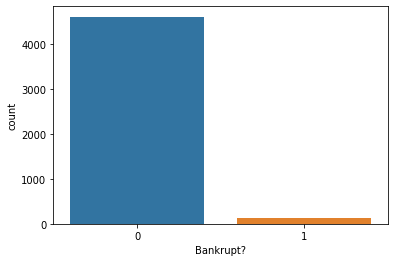

In [9]:
sns.countplot(train['Bankrupt?'])

As we can see, not a lot of companies went bankrupt. Let's check a few other columns.

<Axes: xlabel=' Total Asset Turnover', ylabel='count'>

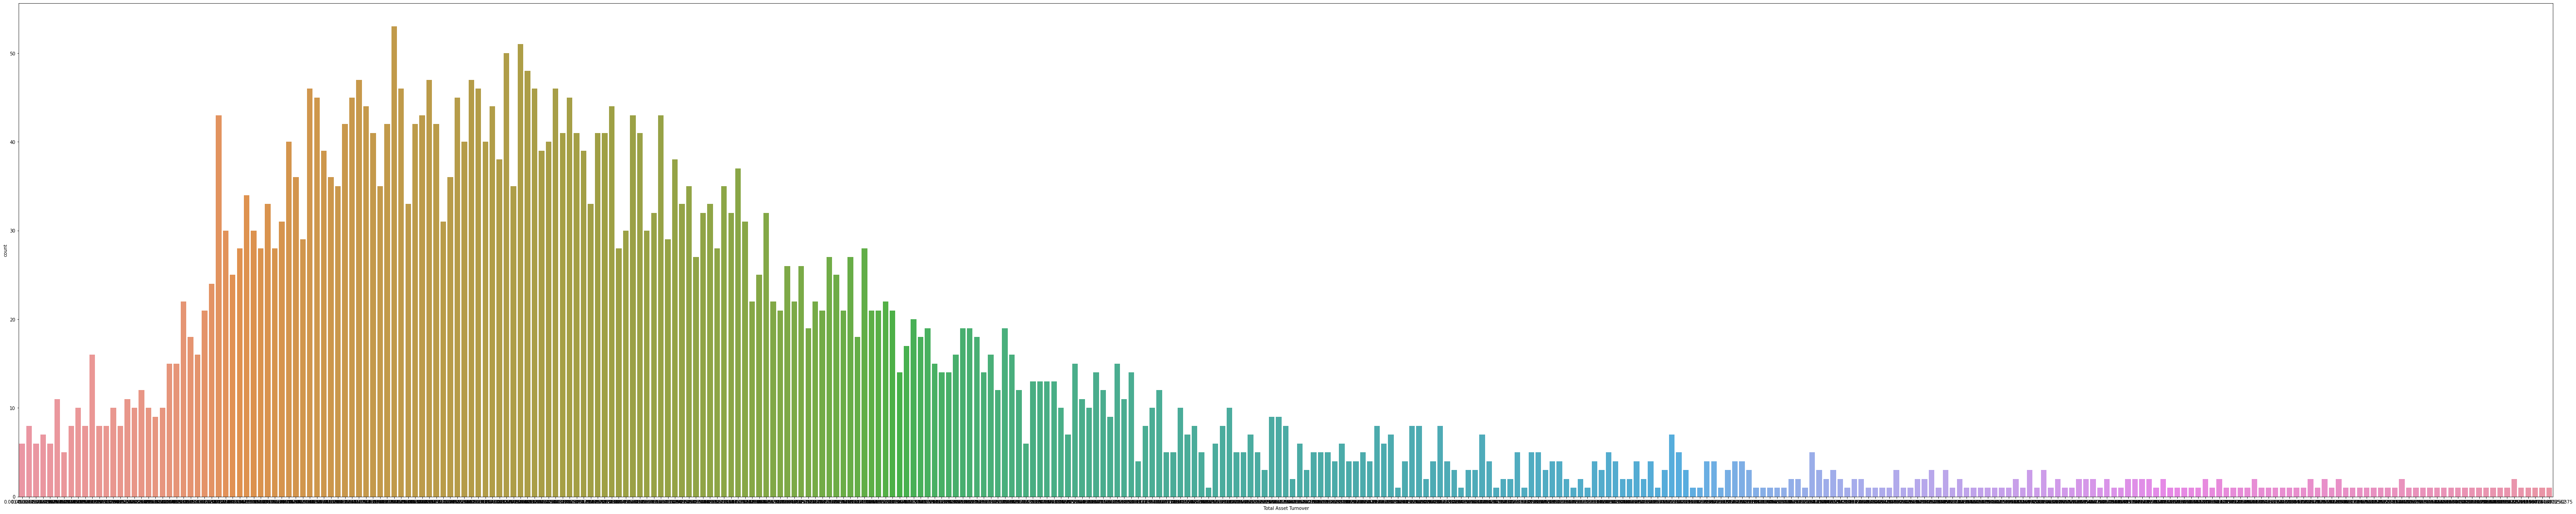

In [10]:
plt.figure(figsize=(100, 20))
sns.countplot(x=' Total Asset Turnover', data=train)

In [11]:
train.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [37]:
target = train.iloc[:, 0:1] 
target
factors_df = train.iloc[:, 1:]
factors_df

test_x = test.iloc[:, 0:1] 
test_y = test.iloc[:, 1:]



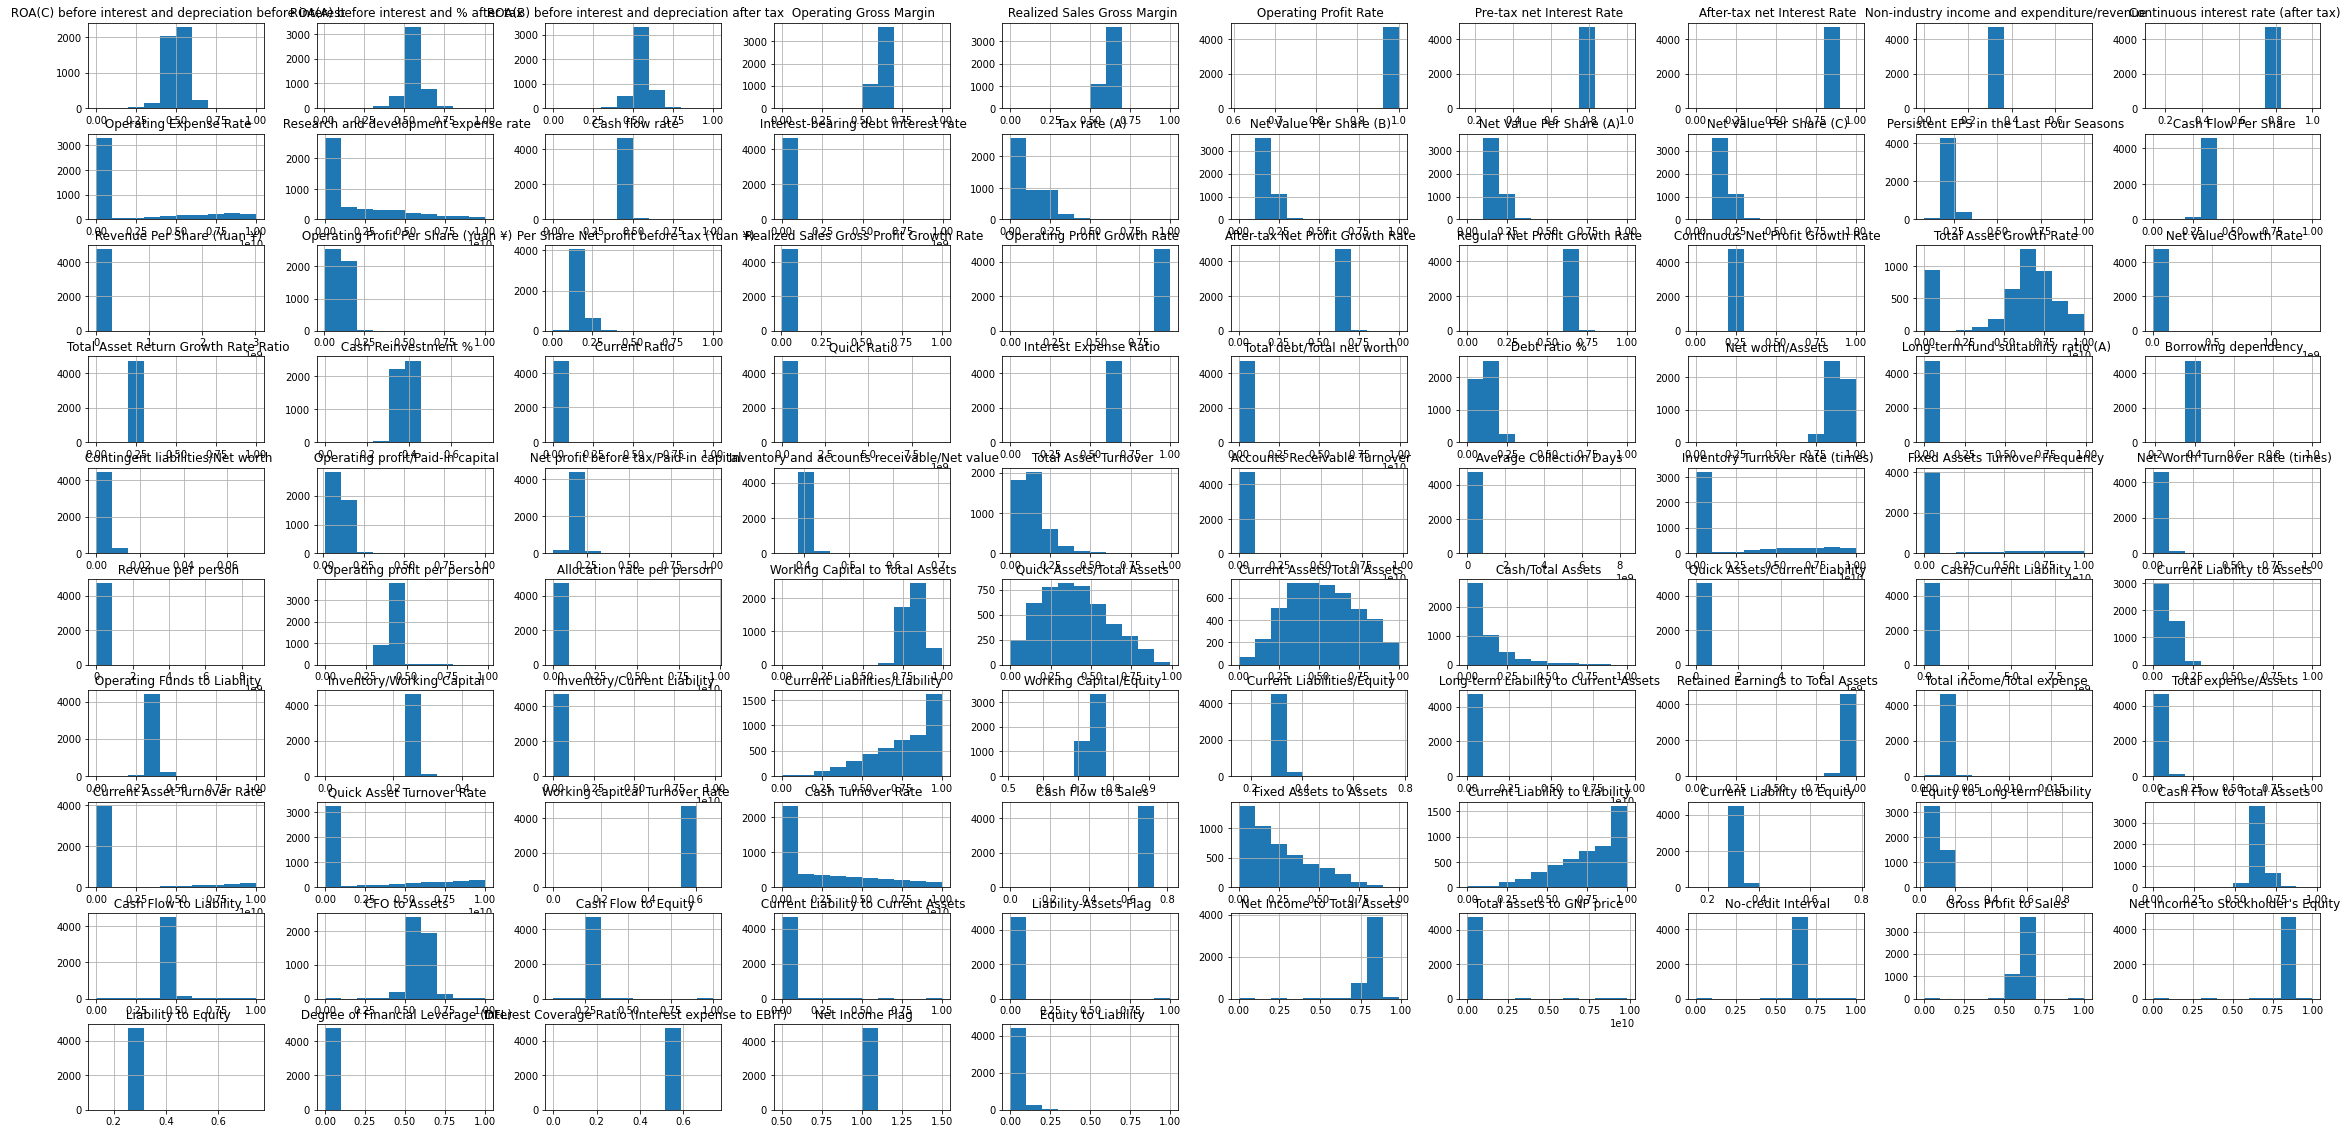

In [13]:
factors_df.hist(bins = 10, figsize=(40, 20))
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


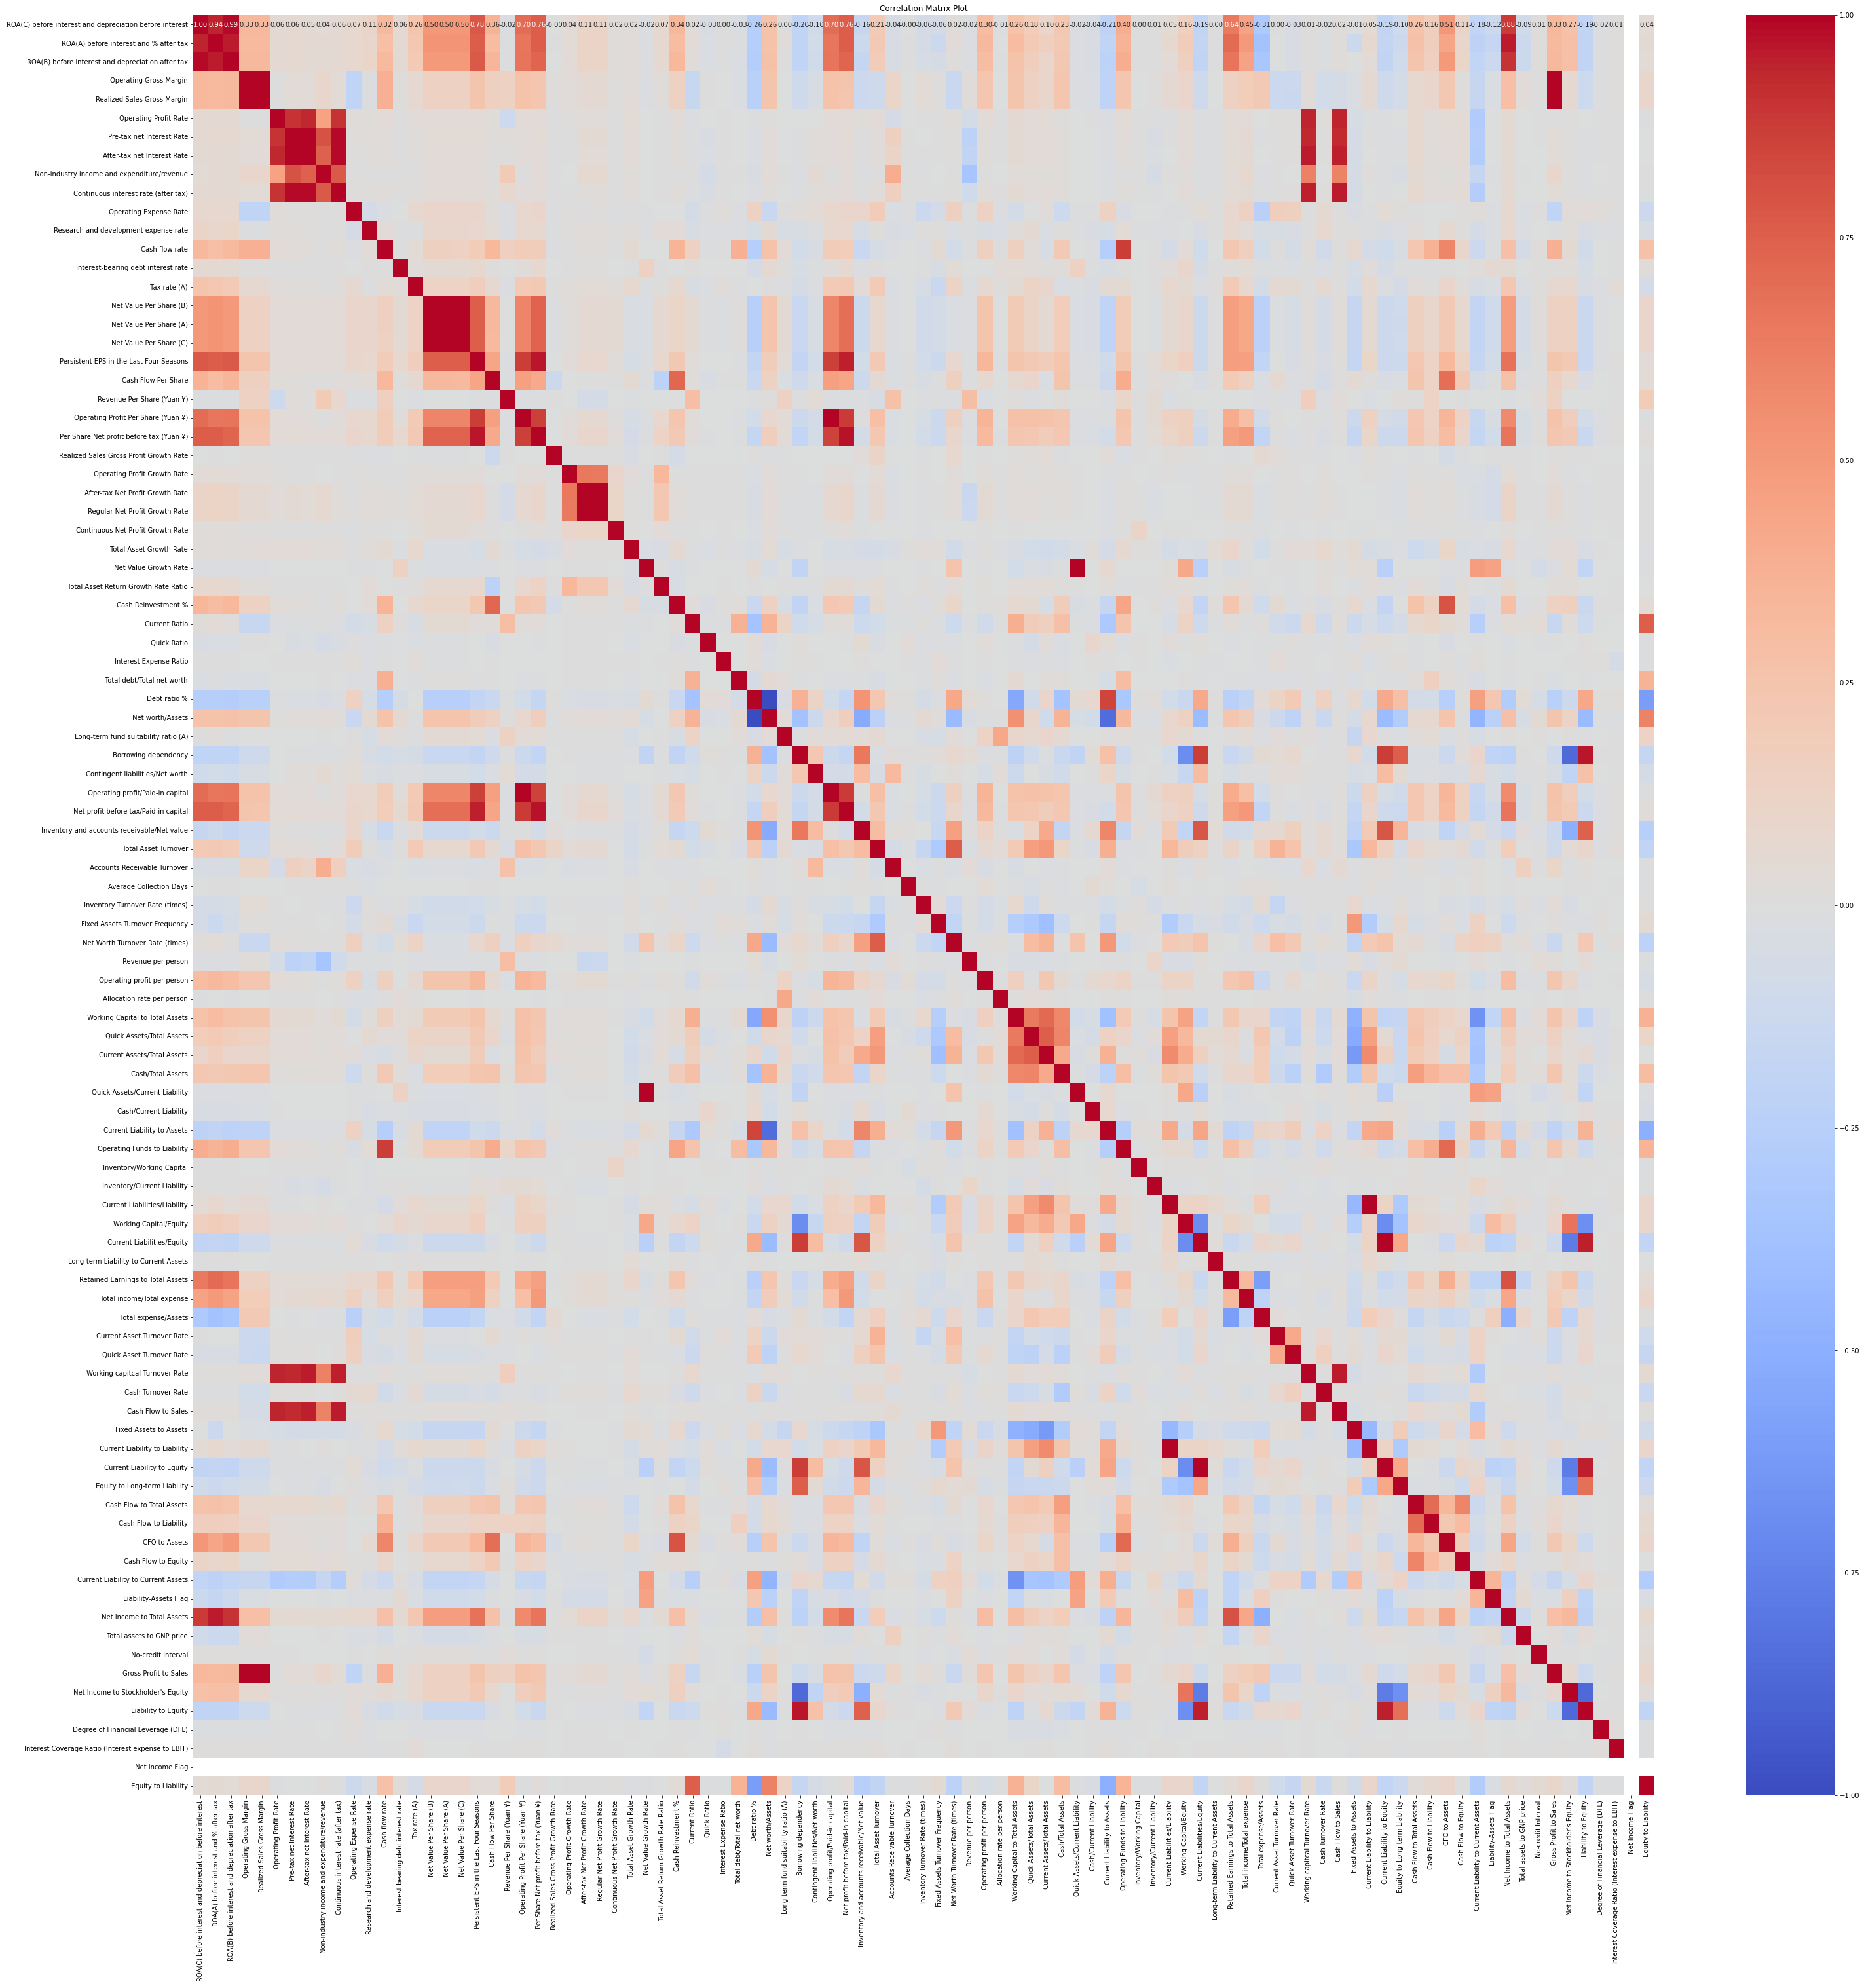

In [14]:
correlation_matrix = factors_df.corr()


plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Plot')
plt.show()

## Dzięki tej macierzy łatwiej jest nam znaleźć zmienne które wydają się być zależne od siebie.

In [15]:
correlation_matrix_rounded = correlation_matrix.round(2)
correlation_matrix_rounded

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
ROA(C) before interest and depreciation before interest,1.00,0.94,0.99,0.33,0.33,0.06,0.06,0.05,0.04,0.06,...,0.88,-0.09,0.01,0.33,0.27,-0.19,-0.02,0.01,NaN,0.04
ROA(A) before interest and % after tax,0.94,1.00,0.95,0.32,0.32,0.06,0.07,0.06,0.06,0.06,...,0.96,-0.13,0.01,0.32,0.29,-0.19,-0.01,0.01,NaN,0.05
ROA(B) before interest and depreciation after tax,0.99,0.95,1.00,0.33,0.32,0.06,0.06,0.05,0.05,0.06,...,0.91,-0.12,0.01,0.33,0.28,-0.19,-0.02,0.01,NaN,0.04
Operating Gross Margin,0.33,0.32,0.33,1.00,1.00,0.00,0.05,0.03,0.09,0.04,...,0.29,0.03,0.01,1.00,0.07,-0.11,-0.01,0.01,NaN,0.09
Realized Sales Gross Margin,0.33,0.32,0.32,1.00,1.00,0.00,0.05,0.03,0.09,0.04,...,0.29,0.03,0.01,1.00,0.07,-0.11,-0.01,0.01,NaN,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,-0.19,-0.19,-0.19,-0.11,-0.11,-0.01,-0.01,-0.01,-0.02,-0.01,...,-0.21,0.03,-0.00,-0.11,-0.86,1.00,0.00,0.00,NaN,-0.19
Degree of Financial Leverage (DFL),-0.02,-0.01,-0.02,-0.01,-0.01,0.00,0.00,0.00,-0.00,0.00,...,-0.01,-0.00,-0.01,-0.01,-0.00,0.00,1.00,0.02,NaN,-0.02
Interest Coverage Ratio (Interest expense to EBIT),0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.01,0.00,0.00,0.02,1.00,NaN,-0.01
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


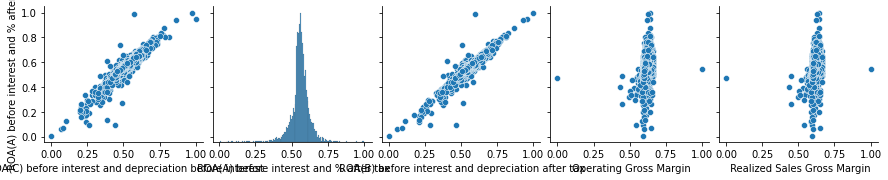

In [16]:
sns.pairplot(factors_df, y_vars=factors_df.columns.values[1:2], x_vars=factors_df.columns.values[:5])


In [17]:
high_correlation_pairs = {}
for i in range(len(correlation_matrix_rounded.columns)):
    for j in range(i+1, len(correlation_matrix_rounded.columns)):
        pair = (correlation_matrix_rounded.columns[i], correlation_matrix_rounded.columns[j])
        correlation_value = correlation_matrix_rounded.iloc[i, j]
        if abs(correlation_value) > 0.5:
            high_correlation_pairs[pair] = correlation_value


for pair, correlation_value in high_correlation_pairs.items():
    print(f"Pair: {pair}, Correlation Value: {correlation_value}")


Pair: (' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax'), Correlation Value: 0.94
Pair: (' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax'), Correlation Value: 0.99
Pair: (' ROA(C) before interest and depreciation before interest', ' Persistent EPS in the Last Four Seasons'), Correlation Value: 0.78
Pair: (' ROA(C) before interest and depreciation before interest', ' Operating Profit Per Share (Yuan ¥)'), Correlation Value: 0.7
Pair: (' ROA(C) before interest and depreciation before interest', ' Per Share Net profit before tax (Yuan ¥)'), Correlation Value: 0.76
Pair: (' ROA(C) before interest and depreciation before interest', ' Operating profit/Paid-in capital'), Correlation Value: 0.7
Pair: (' ROA(C) before interest and depreciation before interest', ' Net profit before tax/Paid-in capital'), Correlation Value: 0.76
Pair: (' ROA(C) before interest and depreciation befo

<Axes: >

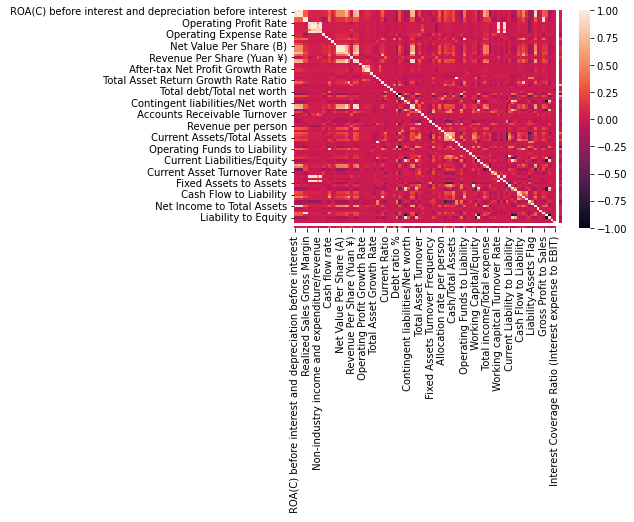

In [18]:
sns.heatmap(factors_df.corr())

## Szukamy kolumn z bardzo małym odchyleniem standardowym

In [19]:
std_devs = factors_df.std()
columns_with_low_std_dev = std_devs[std_devs < 0.05]
print(columns_with_low_std_dev)

 Operating Gross Margin                                0.016982
 Realized Sales Gross Margin                           0.016966
 Operating Profit Rate                                 0.005716
 Pre-tax net Interest Rate                             0.010176
 After-tax net Interest Rate                           0.012439
 Non-industry income and expenditure/revenue           0.008752
 Continuous interest rate (after tax)                  0.010097
 Cash flow rate                                        0.017972
 Net Value Per Share (B)                               0.034444
 Net Value Per Share (A)                               0.034539
 Net Value Per Share (C)                               0.034549
 Persistent EPS in the Last Four Seasons               0.034024
 Cash Flow Per Share                                   0.018630
 Operating Profit Per Share (Yuan ¥)                   0.028374
 Per Share Net profit before tax (Yuan ¥)              0.033583
 Realized Sales Gross Profit Growth Rate

# Inżynieria cech

#### From this section forward, we will try to identify factors that can be usefull when trying to predict granting a loan

POPRAW TO!!!


In [34]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [43]:
threshold = 0.05
print("threshold=", threshold)

sel = VarianceThreshold(threshold=threshold)
transformed_factors = sel.fit_transform(factors_df)
transformed_factors

threshold= 0.05


Index([' Operating Expense Rate', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)',
       ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio',
       ' Total debt/Total net worth', ' Accounts Receivable Turnover',
       ' Average Collection Days', ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Allocation rate per person', ' Quick Assets/Current Liability',
       ' Cash/Current Liability', ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Total assets to GNP price'],
      dtype='object')

In [48]:
selected_indices
test_x[:, selected_indices]

InvalidIndexError: (slice(None, None, None), array([10, 11, 13, 20, 28, 29, 33, 35, 45, 46, 47, 48, 50, 52, 57, 58, 62,
       66, 70, 71, 73, 86], dtype=int64))

In [49]:
selected_indices

array([10, 11, 13, 20, 28, 29, 33, 35, 45, 46, 47, 48, 50, 52, 57, 58, 62,
       66, 70, 71, 73, 86], dtype=int64)

In [40]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic_regression', LogisticRegression())  # Logistic Regression model
])

# Train the pipeline
pipeline.fit(transformed_df, target)

# Evaluate the model
train_accuracy = pipeline.score(transformed_df, target)
test_accuracy = pipeline.score(test_x, test_y)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Bankrupt?
Feature names seen at fit time, yet now missing:
-  Accounts Receivable Turnover
-  Allocation rate per person
-  Average Collection Days
-  Cash Turnover Rate
-  Cash/Current Liability
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 1 features, but StandardScaler is expecting 22 features as input.